In [1]:
import numpy as np
import pickle
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import urllib
from matplotlib import animation, rc

In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(device)

cuda:1


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

---

- Support Vector Machine

rbf: Gaussian RBF Kernel Function RBF is the radial basis function. This is used when there is no prior knowledge about the data.

$\begin{align}
    K(x_i,x_j)=exp(-\gamma ||x_i - x_j||^2)
\end{align}$

In [5]:
from sklearn import svm

def mymodel_SVM(X_train, y_train, X_test, y_test, C=1., kernel='rbf'):
    clf = svm.SVC(C=C, kernel=kernel)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    confusion_matrix(y_test, y_pred)
    
    print(classification_report(y_test, y_pred))

In [6]:
def mypca(X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
#     plt.figure()
#     for ii in np.unique(y):
#         plt.scatter(X_pca[y == ii, 0], X_pca[y == ii, 1], cmap='Accent'
#                     , alpha=.8, lw=2, label=ii)
    # plt.legend(loc='best', shadow=False, scatterpoints=1)
    return X_pca

In [7]:
def mylda(X, y, n_components=2):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_lda = lda.fit_transform(X, y)
    print(X_lda.shape)
#     plt.figure()
#     for ii in np.unique(y):
#         plt.scatter(X_lda[y == ii, 0], X_lda[y == ii, 1], cmap='Accent'
#                     , alpha=.8, lw=2, label=ii)
    # plt.legend(loc='best', shadow=False, scatterpoints=1)
    return X_lda

- Perceptron

#### Standardize Input

For neural networks to train properly, we need to standardize the input values. We standardize features by removing the mean and scaling to unit variance. The standard score of a sample `x` where the mean is `u` and the standard deviation is `s` is calculated as:

$z = (x — u) / s$

You can find more about standardization/normalization in neural nets [here](https://www.jeremyjordan.me/batch-normalization/).

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Parameters
To train our models, we need to set some hyper-parameters. Note that this is a very simple neural network, as a result, we do not tune a lot of hyper-parameters. The goal is to get to know how PyTorch works.

#### Define Custom Dataloaders

Let’s initialize our dataloaders. We’ll use a batch_size = 1 for our test dataloader.

In [13]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1)

#### Define Neural Net Architecture

#### Train the model
Before we start the actual training, let’s define a function to calculate accuracy.

In the function below, we take the predicted and actual output as the input. The predicted value(a probability) is rounded off to convert it into either a 0 or a 1.

Once that is done, we simply compare the number of 1/0 we predicted to the number of 1/0 actually present and calculate the accuracy.

Note that the inputs y_pred and y_test are for a batch. Our batch_size was 64. So, this accuracy is being calculated for 64 predictions(tensors) at a time.

The moment we've been waiting for has arrived. Let's train our model.

You can see we've put a `model.train()` at the before the loop. `model.train()` tells PyTorch that you're in training mode.

Well, why do we need to do that? If you're using layers such as Dropout or BatchNorm which behave differently during training and evaluation, you need to tell PyTorch to act accordingly. While the default mode in PyTorch is the train, so, you don't explicitly have to write that. But it's good practice.

Similarly, we'll call `model.eval()` when we test our model. We'll see that below.

Back to training; we start a for-loop. At the top of this for-loop, we initialize our loss and accuracy per epoch to 0. After every epoch, we'll print out the loss/accuracy and reset it back to 0.

Then we have another for-loop. This for-loop is used to get our data in batches from the `train_loader`.

We do `optimizer.zero_grad()` before we make any predictions. Since the `backward()` function accumulates gradients, we need to set it to 0 manually per mini-batch.

From our defined model, we then obtain a prediction, get the loss(and accuracy) for that mini-batch, perform backpropagation using `loss.backward()` and `optimizer.step()`. Finally, we add all the mini-batch losses (and accuracies) to obtain the average loss (and accuracy) for that epoch.

This loss and accuracy is printed out in the outer `for` loop.

#### Test the model
After training is done, we need to test how our model fared. Note that we've used `model.eval()` before we run our testing code. To tell PyTorch that we do not want to perform back-propagation during inference, we use `torch.no_grad()` which reduces memory usage and speeds up computation.

We start by defining a list that will hold our predictions. Then we loop through our batches using the `test_loader`. For each batch —-

- We make the predictions using our trained model.
- Round off the probabilities to 1 or 0.
- Move the batch to the GPU from the CPU.
- Convert the tensor to a numpy object and append it to our list.
- Flatten out the list so that we can use it as an input to `confusion_matrix` and `classification_report`.

#### Confusion Matrix
Once we have all our predictions, we use the `confusion_matrix()` function from scikit-learn to calculate the confusion matrix.

#### Classification Report
To obtain the classification report which has precision, recall, and F1 score, we use the function `classification_report`.

# Dataset #1

In [5]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset1'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(700, 200)
(700,)
(350, 200)
(350,)


(700, 3)


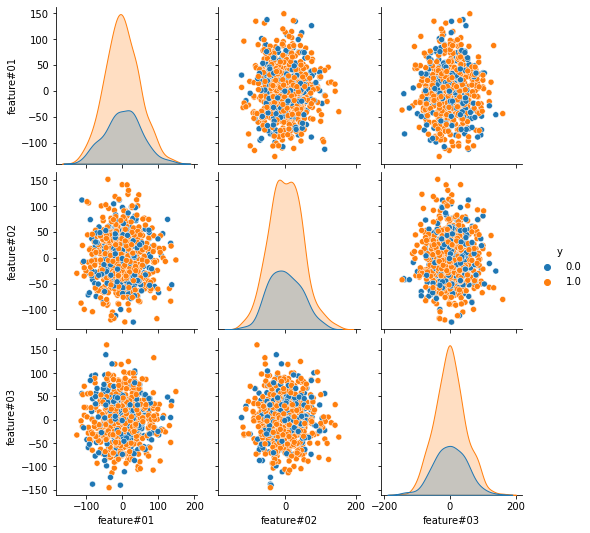

In [6]:
n_components=3

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
print(X_pca.shape)

df_train = pd.DataFrame()

for ii in range(n_components):
    df_train['feature#%02d'%(ii+1)] = X_pca[:,ii]
df_train['y'] = y_train

sns.pairplot(df_train, hue='y')

<AxesSubplot:>

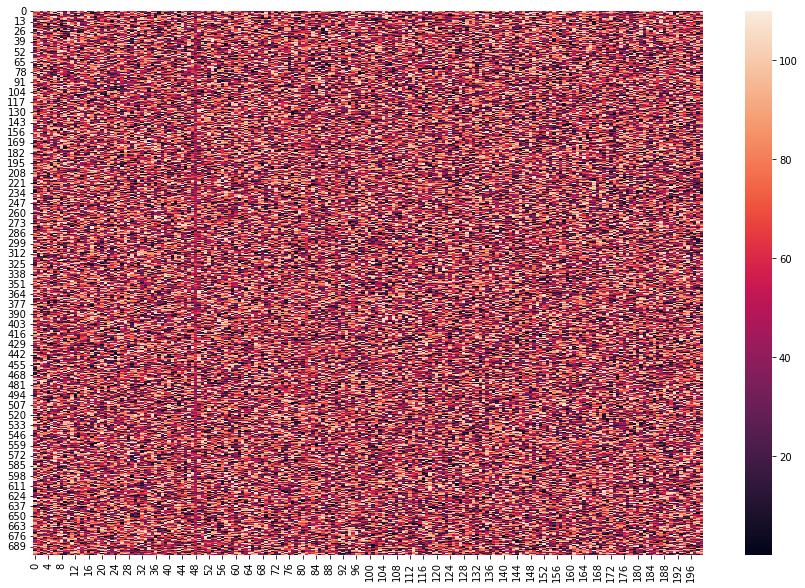

In [6]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

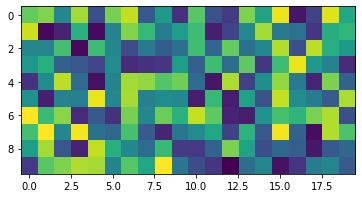

In [7]:
plt.imshow(X_train[np.random.randint(X_train.shape[-1], size=1)[0],:].reshape([10,20]))

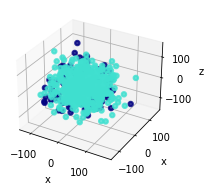

In [19]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)
X_pca.shape

fig, ax = plt.subplots(ncols=1, figsize=(10, 3), subplot_kw={"projection":"3d"})

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('x')
    ax.set_zlabel('z')
    for ii in range(2):
        ax.scatter(X_pca[y_train == ii, 0], X_pca[y_train == ii, 1], X_pca[y_train == ii, 2]
                   , color=colors[ii] , alpha=.8, lw=lw, label=ii)
    return fig,

def animate(i):
    ## 앙각(elevation angle)과 방위각(azimuthal angle)
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init
                               , frames=360, interval=20, blit=True)
# # Save
# anim.save('mpl3d_scatter.gif', fps=30)

In [20]:
rc('animation', html='html5')
anim

In [9]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       1.00      0.08      0.15       100
         1.0       0.73      1.00      0.84       250

    accuracy                           0.74       350
   macro avg       0.87      0.54      0.50       350
weighted avg       0.81      0.74      0.65       350



# Dataset #2

In [7]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset2'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(200, 80)
(200,)
(400, 80)
(400,)


(200, 2)


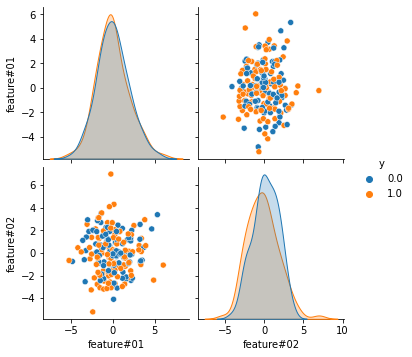

In [8]:
n_components=2

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
print(X_pca.shape)

df_train = pd.DataFrame()

for ii in range(n_components):
    df_train['feature#%02d'%(ii+1)] = X_pca[:,ii]
df_train['y'] = y_train

sns.pairplot(df_train, hue='y')

<AxesSubplot:>

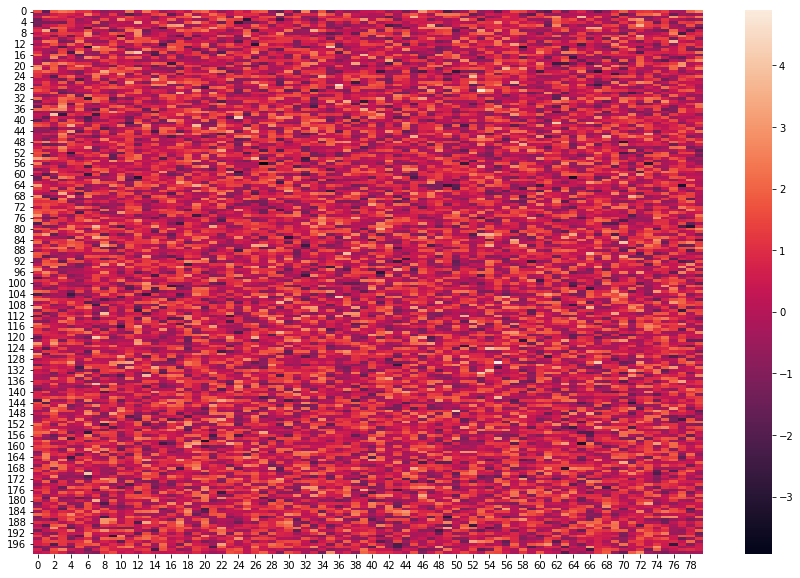

In [13]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

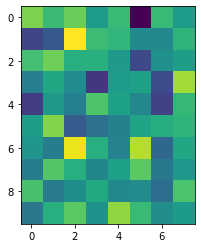

In [14]:
plt.imshow(X_train[np.random.randint(X_train.shape[-1], size=1)[0],:].reshape([10,8]))

In [15]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73       200
         1.0       0.73      0.70      0.72       200

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



# Dataset #3

In [8]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset3'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


(60000, 3)


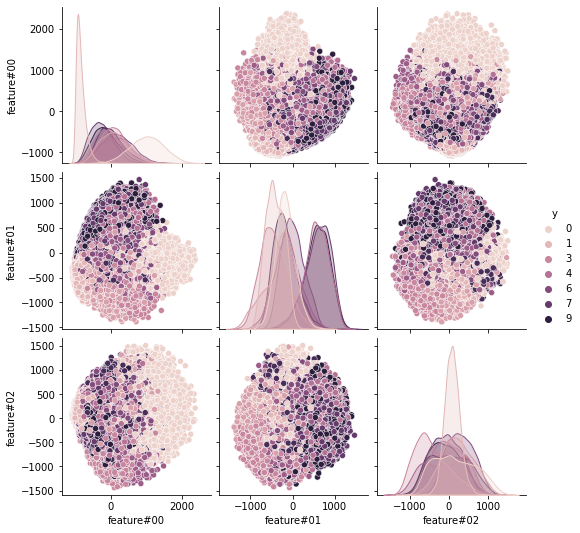

In [10]:
n_components=3

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
print(X_pca.shape)

df_train = pd.DataFrame()

for ii in range(n_components):
    df_train['feature#%02d'%ii] = X_pca[:,ii]
df_train['y'] = y_train

sns.pairplot(df_train, hue='y')

(60000, 3)


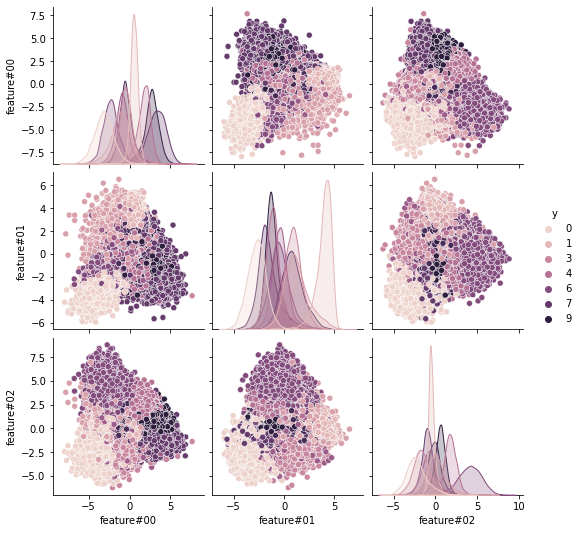

In [10]:
n_components=3

lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda = lda.fit_transform(X_train, y_train)
print(X_lda.shape)

df_train = pd.DataFrame()

for ii in range(n_components):
    df_train['feature#%02d'%ii] = X_lda[:,ii]
df_train['y'] = y_train

sns.pairplot(df_train, hue='y')

<AxesSubplot:>

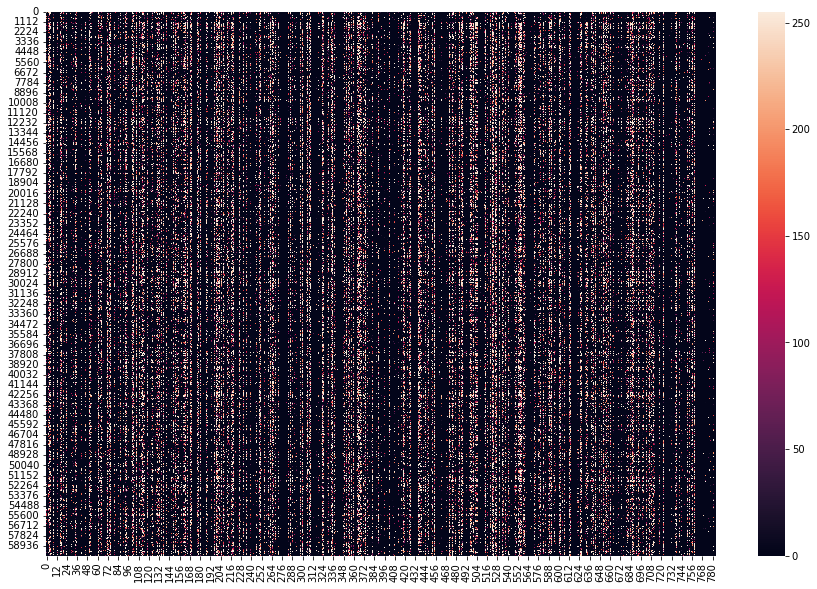

In [5]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

9


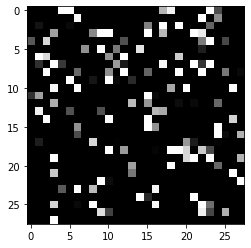

In [5]:
idx=6
plt.imshow(X_train[idx].reshape((28, 28), order='C'), cmap='gray')
print(y_train[idx])

In [13]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5952
           1       0.99      0.99      0.99      6791
           2       0.97      0.98      0.98      6026
           3       0.98      0.97      0.97      6084
           4       0.98      0.98      0.98      5780
           5       0.97      0.98      0.97      5454
           6       0.99      0.98      0.98      5957
           7       0.98      0.97      0.98      6231
           8       0.97      0.97      0.97      5890
           9       0.97      0.96      0.97      5835

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [14]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

#### Normalizing the Image Data
Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [15]:
# scaler = StandardScaler()
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train = torch.FloatTensor(X_train)
y_train = torch.IntTensor(y_train)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [17]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10)

    def forward(self, x):
        return self.linear(x)

model = Model()
model.to(device)

Model(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [18]:
loss_function = F.cross_entropy
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [19]:
for epoch in range(EPOCHS):
    epoch_loss = 0
    epoch_acc = 0
    for x_batch, y_batch_true in train_loader:
        
        x_batch, y_batch_true = x_batch.to(device), y_batch_true.to(device, dtype=torch.int64)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward
        y_batch_log_pred = model(x_batch)
        loss = loss_function(y_batch_log_pred, y_batch_true)
        y_batch_pred = torch.argmax(y_batch_log_pred, dim=-1)
        acc = (y_batch_pred == y_batch_true).to(torch.float).mean()

        # Backword
        loss.backward()

        # Update
        optimizer.step()
        
        
        epoch_loss += loss.item()
        epoch_acc += acc
        
    print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

#     with torch.no_grad():
#         y_test_log_pred = model(X_test)
#     print(f"End of epoch {epoch + 1}")
#     print_loss_accuracy(y_test_log_pred, y_test, loss_function)
#     print("---")

Epoch 000: | Loss: 1.89782 | Acc: 0.554
Epoch 001: | Loss: 1.39047 | Acc: 0.755
Epoch 002: | Loss: 1.12427 | Acc: 0.798
Epoch 003: | Loss: 0.96775 | Acc: 0.818
Epoch 004: | Loss: 0.86575 | Acc: 0.831
Epoch 005: | Loss: 0.79398 | Acc: 0.839
Epoch 006: | Loss: 0.74061 | Acc: 0.844
Epoch 007: | Loss: 0.69913 | Acc: 0.849
Epoch 008: | Loss: 0.66603 | Acc: 0.853
Epoch 009: | Loss: 0.63867 | Acc: 0.856
Epoch 010: | Loss: 0.61579 | Acc: 0.859
Epoch 011: | Loss: 0.59642 | Acc: 0.862
Epoch 012: | Loss: 0.57938 | Acc: 0.864
Epoch 013: | Loss: 0.56454 | Acc: 0.866
Epoch 014: | Loss: 0.55163 | Acc: 0.867
Epoch 015: | Loss: 0.54001 | Acc: 0.869
Epoch 016: | Loss: 0.52941 | Acc: 0.871
Epoch 017: | Loss: 0.52009 | Acc: 0.872
Epoch 018: | Loss: 0.51147 | Acc: 0.873
Epoch 019: | Loss: 0.50359 | Acc: 0.874
Epoch 020: | Loss: 0.49634 | Acc: 0.875
Epoch 021: | Loss: 0.48969 | Acc: 0.877
Epoch 022: | Loss: 0.48349 | Acc: 0.878
Epoch 023: | Loss: 0.47787 | Acc: 0.879
Epoch 024: | Loss: 0.47247 | Acc: 0.880


In [20]:
X_test = torch.FloatTensor(X_test)
test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [21]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for [X_batch] in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        tag = torch.argmax(y_test_pred, dim=-1)
        y_pred_list.append(tag.cpu().numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])

In [22]:
confusion_matrix(y_test, y_pred_list)

array([[5718,    1,   38,   23,   12,   35,   65,   11,   41,    8],
       [   1, 6579,   35,   19,    2,   25,   15,    3,  108,    4],
       [  46,   63, 5160,   98,  119,   17,  116,  123,  231,   53],
       [  34,   24,  177, 5267,    3,  223,   32,   81,  152,   91],
       [  14,   26,   24,    5, 5243,    5,   81,   21,   37,  324],
       [  97,   69,   39,  261,  115, 4412,  108,   47,  224,   82],
       [  91,   38,   63,    9,   66,  117, 5519,    2,   50,    2],
       [  35,   90,  133,   20,  101,    3,    1, 5590,   24,  234],
       [  45,  143,   78,  197,   61,  188,   49,   56, 4926,  147],
       [  53,   33,   51,   79,  256,   43,    5,  145,   61, 5109]])

In [23]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5952
           1       0.93      0.97      0.95      6791
           2       0.89      0.86      0.87      6026
           3       0.88      0.87      0.87      6084
           4       0.88      0.91      0.89      5780
           5       0.87      0.81      0.84      5454
           6       0.92      0.93      0.92      5957
           7       0.92      0.90      0.91      6231
           8       0.84      0.84      0.84      5890
           9       0.84      0.88      0.86      5835

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



# Dataset #4

In [21]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset4'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(200, 100)
(200,)
(200, 100)
(200,)


<AxesSubplot:>

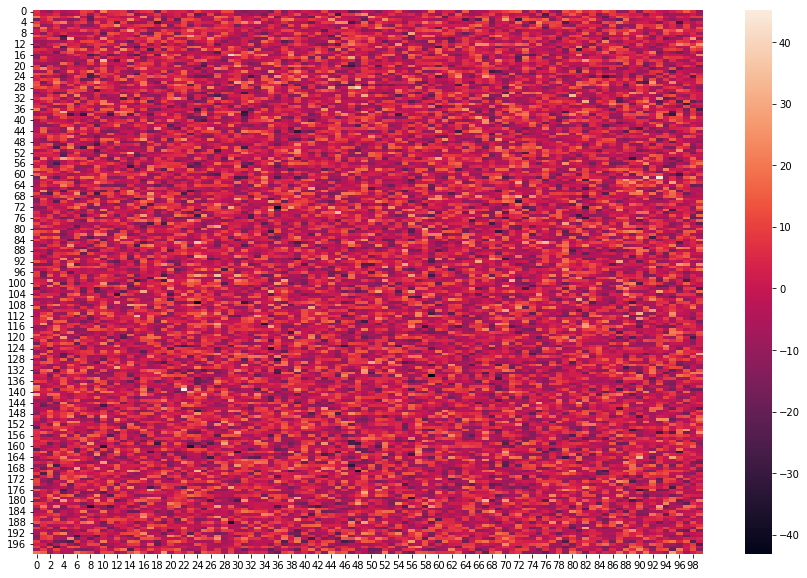

In [22]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

In [23]:
mymodel_SVM(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       100
         1.0       0.78      0.80      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



# Dataset #5

In [5]:
target_url = 'http://aais.hanyang.ac.kr/classes/2022_Datasets/Dataset5'
with urllib.request.urlopen(target_url) as handle:
    X_train = pickle.load(handle)
    print(X_train.shape)
    y_train = pickle.load(handle)
    print(y_train.shape)
    X_test = pickle.load(handle)
    print(X_test.shape)
    y_test = pickle.load(handle)
    print(y_test.shape)

(391500, 300)
(391500,)
(167650, 300)
(167650,)


(391500, 3)


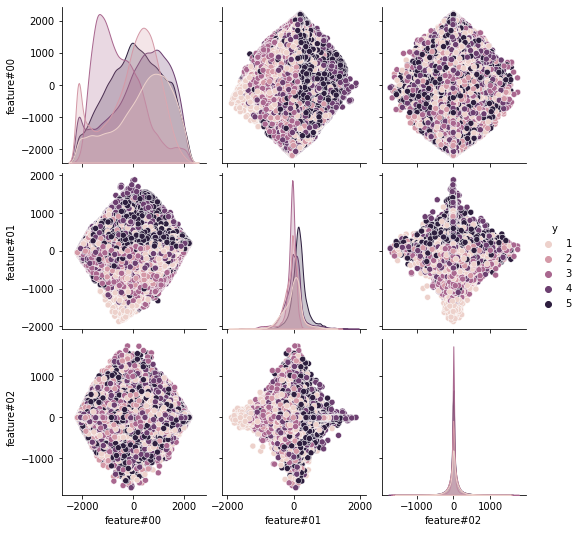

In [25]:
n_components=3

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
print(X_pca.shape)

df_train = pd.DataFrame()

for ii in range(n_components):
    df_train['feature#%02d'%ii] = X_pca[:,ii]
df_train['y'] = y_train

sns.pairplot(df_train, hue='y')

(391500, 3)


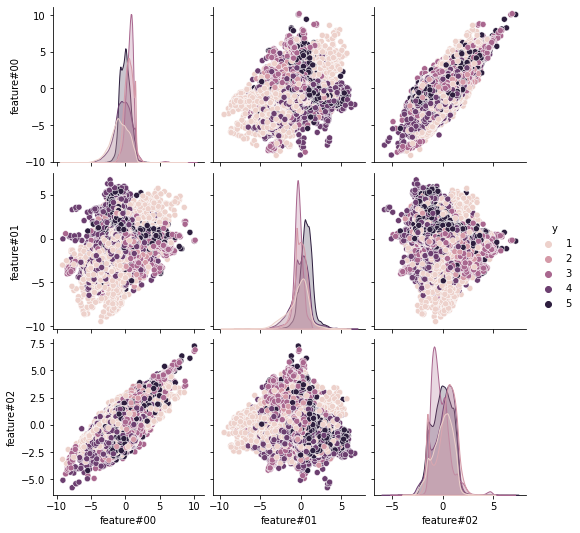

In [7]:
n_components=3

lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda = lda.fit_transform(X_train, y_train)
print(X_lda.shape)

df_train = pd.DataFrame()

for ii in range(n_components):
    df_train['feature#%02d'%ii] = X_lda[:,ii]
df_train['y'] = y_train

sns.pairplot(df_train, hue='y')

<AxesSubplot:>

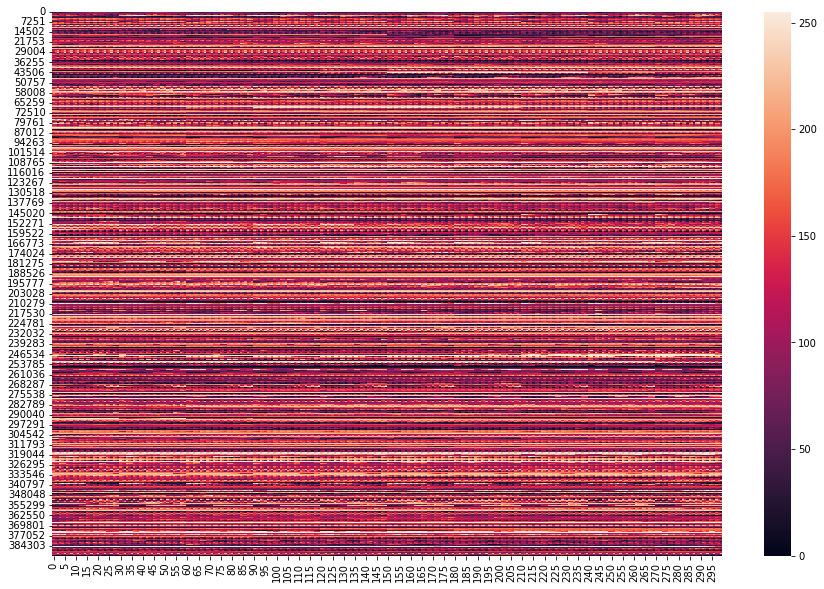

In [5]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(X_train)

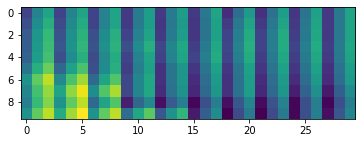

In [73]:
idx=np.random.randint(X_train.shape[-1], size=1)[0]
plt.imshow(X_train[idx].reshape((10, 30)))

1


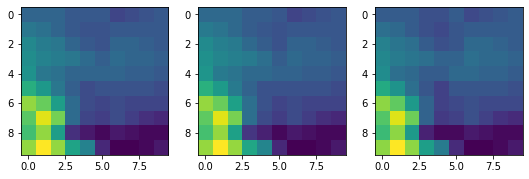

In [74]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3))

for ii in range(3):
    axs[ii].imshow(X_train[idx].reshape((10, 10, 3))[:,:,ii])
print(y_train[idx])

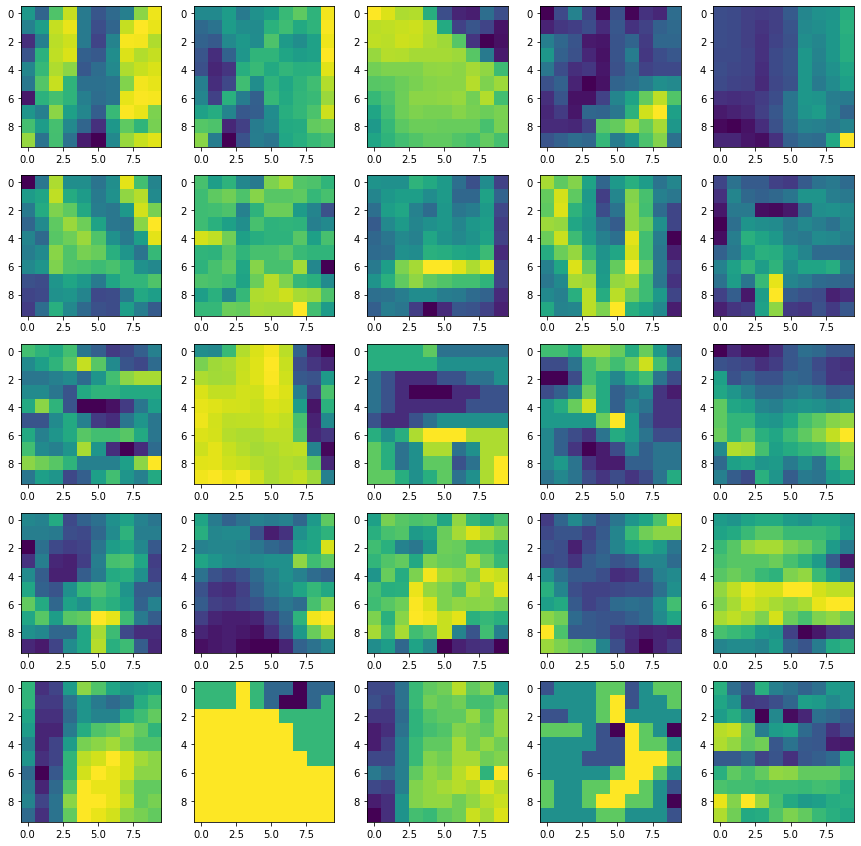

In [23]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15,15))

for ii, label in enumerate(np.unique(y_train)):
    idcs = np.random.choice(np.where(y_train==label)[0], size=5, replace=False)
    for jj, idx in enumerate(idcs):
        axs[ii,jj].imshow(X_train[idx].reshape((10, 10, 3))[:,:,0])

---

In [7]:
EPOCHS = 60
BATCH_SIZE = 64
LEARNING_RATE = 0.001

#### Preprocessing the Data

- Normalizing the Image Data:

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [8]:
# scaler = StandardScaler()
X_train = X_train / 255
X_test = X_test / 255

- Re-labeling:

Encode target labels with value between $0$ and $n_{class}-1$.

In [19]:
e = LabelEncoder()
y_train = e.fit_transform(y_train)
y_test = e.fit_transform(y_test)

In [11]:
X_train = torch.FloatTensor(X_train)
y_train = torch.IntTensor(y_train)
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [12]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(300, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 5)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(16)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.batchnorm2(x)
        x = self.dropout(x)
        output = self.fc3(x)  
        return output

model = Model()
model.to(device)

Model(
  (fc1): Linear(in_features=300, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [13]:
loss_function = F.cross_entropy
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [14]:
for epoch in range(EPOCHS):
    epoch_loss = 0
    epoch_acc = 0
    for x_batch, y_batch_true in train_loader:
        
        x_batch, y_batch_true = x_batch.to(device), y_batch_true.to(device, dtype=torch.int64)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward
        y_batch_log_pred = model(x_batch)
        loss = loss_function(y_batch_log_pred, y_batch_true)
        y_batch_pred = torch.argmax(y_batch_log_pred, dim=-1)
        acc = (y_batch_pred == y_batch_true).to(torch.float).mean()

        # Backword
        loss.backward()

        # Update
        optimizer.step()
        
        
        epoch_loss += loss.item()
        epoch_acc += acc
        
    print(f'Epoch {epoch+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

#     with torch.no_grad():
#         y_test_log_pred = model(X_test)
#     print(f"End of epoch {epoch + 1}")
#     print_loss_accuracy(y_test_log_pred, y_test, loss_function)
#     print("---")

Epoch 000: | Loss: 1.33896 | Acc: 0.452
Epoch 001: | Loss: 1.30404 | Acc: 0.472
Epoch 002: | Loss: 1.29059 | Acc: 0.478
Epoch 003: | Loss: 1.28179 | Acc: 0.482
Epoch 004: | Loss: 1.27603 | Acc: 0.486
Epoch 005: | Loss: 1.27085 | Acc: 0.489
Epoch 006: | Loss: 1.26458 | Acc: 0.492
Epoch 007: | Loss: 1.26332 | Acc: 0.494
Epoch 008: | Loss: 1.25926 | Acc: 0.496
Epoch 009: | Loss: 1.25796 | Acc: 0.496
Epoch 010: | Loss: 1.25665 | Acc: 0.497
Epoch 011: | Loss: 1.25444 | Acc: 0.498
Epoch 012: | Loss: 1.25312 | Acc: 0.498
Epoch 013: | Loss: 1.24974 | Acc: 0.500
Epoch 014: | Loss: 1.24808 | Acc: 0.500
Epoch 015: | Loss: 1.24719 | Acc: 0.501
Epoch 016: | Loss: 1.24633 | Acc: 0.501
Epoch 017: | Loss: 1.24543 | Acc: 0.502
Epoch 018: | Loss: 1.24340 | Acc: 0.502
Epoch 019: | Loss: 1.24310 | Acc: 0.503
Epoch 020: | Loss: 1.24190 | Acc: 0.503
Epoch 021: | Loss: 1.24121 | Acc: 0.504
Epoch 022: | Loss: 1.23960 | Acc: 0.505
Epoch 023: | Loss: 1.23960 | Acc: 0.505
Epoch 024: | Loss: 1.23768 | Acc: 0.505


In [15]:
X_test = torch.FloatTensor(X_test)
test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [20]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for [X_batch] in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        tag = torch.argmax(y_test_pred, dim=-1)
        y_pred_list.append(tag.cpu().numpy())

y_pred_list = np.array([a.squeeze().tolist() for a in y_pred_list])

In [21]:
confusion_matrix(y_test, y_pred_list)

array([[ 9709,  4535,  1258,  5121,  5277],
       [  186, 22392,  3399,  1509,  6214],
       [  421,  4637, 25779,  1113,  2050],
       [ 6409,  9971,  3021,  8065,  7784],
       [  875,  7461,  4104,  1863, 24497]])

In [22]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.55      0.37      0.45     25900
           1       0.46      0.66      0.54     33700
           2       0.69      0.76      0.72     34000
           3       0.46      0.23      0.30     35250
           4       0.53      0.63      0.58     38800

    accuracy                           0.54    167650
   macro avg       0.54      0.53      0.52    167650
weighted avg       0.54      0.54      0.52    167650

